In [87]:
import tensorflow as tf
from tensorflow_examples.models.pix2pix import pix2pix

import tensorflow_datasets as tfds

from IPython.display import clear_output
import matplotlib.pyplot as plt

import os
import numpy as np
from PIL import Image

In [88]:
trainIm_path = 'D:/DDSM_Segmentation/Train_Images/'
trainLabel_path = 'D:/DDSM_Segmentation/Train_Labels_Full/'

In [114]:
for file in os.listdir(trainIm_path):
    im, mask = Image.open(trainIm_path+file), Image.open(trainLabel_path+file)
    im = np.array(im.convert('RGB'))
    im = im/255.0
    mask = np.array(mask.convert('L'))
    mask = np.resize(mask, (224,224,1))
    temp_dataset = tf.data.Dataset.from_tensors((im, mask))
    try: 
        train_dataset = tf.data.Dataset.concatenate(train_dataset, temp_dataset)
        print("add")
    except:
        train_dataset = tf.data.Dataset.from_tensors((im, mask))
        print("new")

new
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add
add


In [101]:
#train_dataset = tf.data.Dataset
temp_dataset = tf.data.Dataset.from_tensors((im, mask))
#train_dataset = tf.data.Dataset.concatenate(train_dataset, temp_dataset)

In [91]:
def display(display_list):
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

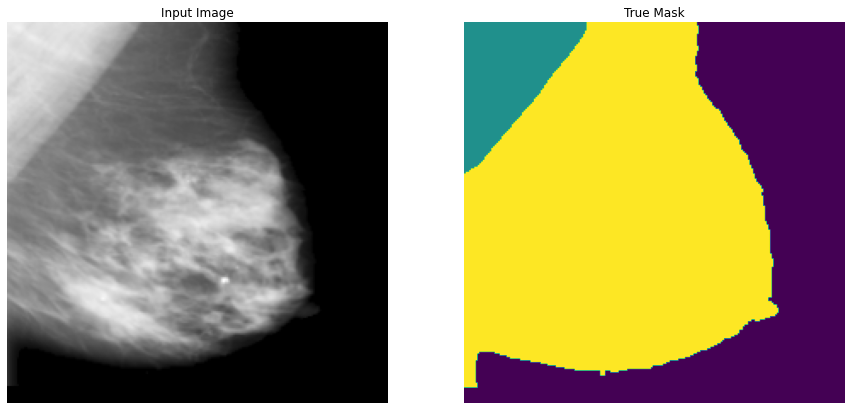

In [119]:
for image, mask in train_dataset.take(5):
    sample_image, sample_mask = image, mask
display([sample_image, sample_mask])

In [122]:
TRAIN_LENGTH = len(os.listdir('D:/DDSM_Segmentation/Train_Images/'))
BATCH_SIZE = 64
BUFFER_SIZE = 1000
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE

In [123]:
train_dataset1 = train_dataset.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
train_dataset1 = train_dataset1.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [124]:
train_dataset1

<PrefetchDataset shapes: ((None, 224, 224, 3), (None, 224, 224, 1)), types: (tf.float64, tf.uint8)>